In [ ]:
#this code does the analog version of n and b analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import scipy.ndimage as ndi
import analysis_utils as simutils
import pysimfcs_utils as simutils2

In [2]:
#get the jet colormap with the under values set to white
ncmap=plt.colormaps['jet']
ncmap.set_under([1,1,1,1])

In [3]:
#read in our simulated movie
simstack=tifffile.imread('analog_movie.tif')
simstack.shape

(256, 1, 64, 64)

In [4]:
#first we need to get the S value (var vs. int slope without fluctuations)
#since our demo data is simulated, let's simulate a gradient with the same noise settings
gradimg=np.tile(np.linspace(0.0,10.0,64),[64,1])
#set the analog noise settings
simutils.analoggain=20.0
simutils.analogoffset=100.0
simutils.analogreadstdev=5.0
gradstack=np.array([simutils2.addNoise(gradimg,noisemode='analog') for i in range(256)])
gradavg=gradstack.mean(axis=0)
gradvar=gradstack.var(axis=0)

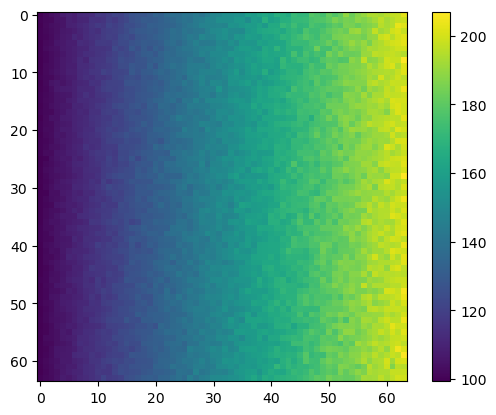

In [5]:
plt.imshow(gradavg)
plt.colorbar()

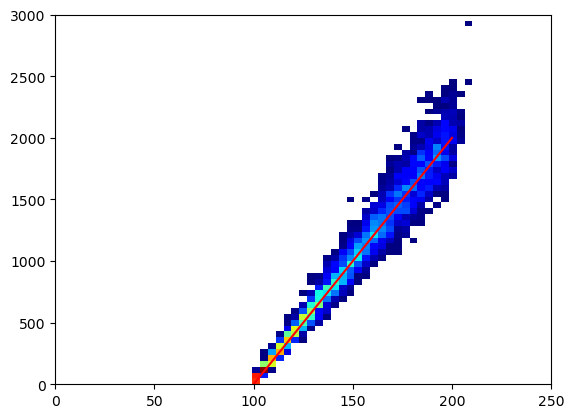

In [6]:
bins=(np.linspace(0,250,64),np.linspace(0,3000,64))
_=plt.hist2d(gradavg.flat,gradvar.flat,bins=bins,cmap=ncmap,vmin=1)
#try an S value of 20 starting at the offset (should be the analog gain)
plt.plot([100,200],[0,2000],'r-')

In [7]:
#here we calculate all of the number and brightness statistic images
S=20.0
offset=100.0
sms=2 #the smoothing standard deviation
thresh=0.0 #the threshold for calculating I and B
avg=simstack.mean(axis=0)
var=simstack.var(axis=0)
avgcorr=(avg-offset)/S
bright=var/(S*avg)-1
mask=avg<thresh #this is a boolean image denoting the threshold
avgcorr[mask]=np.nan
bright[mask]=np.nan
avgsm=ndi.gaussian_filter(avgcorr,sigma=[0,sms,sms])
brightsm=ndi.gaussian_filter(bright,sigma=[0,sms,sms])

In [8]:
amax=avgcorr.max()
amin=avgcorr.min()
brightmax=bright.max()
brightmin=bright.min()
print('avg corr min, max:',amin,amax,'brightness min, max:',brightmin,brightmax)

avg corr min, max: 5.853235308217205 9.687368336671991 brightness min, max: 0.4758928823798494 3.9247568197442684


Text(0.5, 0, 'I/S - offset')

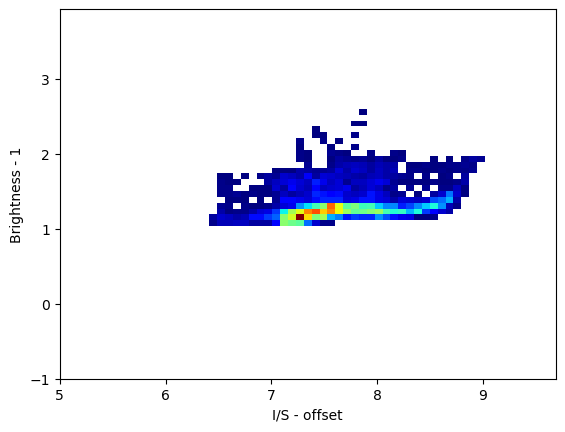

In [9]:
plotavgmax=amax #change this to change the x dimensions of the histogram
plotbrightmax=brightmax #change this to change the y dimensions of the histogram
bins=(np.linspace(5,plotavgmax,64),np.linspace(-1,plotbrightmax,64))
_=plt.hist2d(avgsm[0].flat,brightsm[0].flat,bins=bins,cmap=ncmap,vmin=1) #note that vmin=1 here allows the zero bins to be white
plt.ylabel('Brightness - 1')
plt.xlabel('I/S - offset')

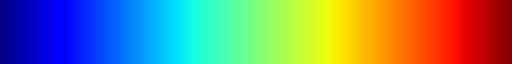

In [10]:
#show the colormap for reference
ncmap